In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import regularizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.models import Model

import numpy as np

img_rows, img_cols = 28, 28
num_classes = 10

def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

fashion_file = "../input/fashionmnist/fashion-mnist_train.csv"
fashion_data = np.loadtxt(fashion_file, skiprows=1, delimiter=',')
x, y = prep_data(fashion_data)

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning.exercise_7 import *
print("Setup Complete")

Setup Complete


In [4]:
def show_final_history(history):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1, 2, figsize=(16,12))

    ax[0].set_title('Loss', fontsize=12)
    ax[0].set_ylabel('Loss', fontsize=10)
    ax[0].set_xlabel('Epochs', fontsize=10)
    ax[0].plot(history.history['loss'], 'r-', label='Training Loss')
    ax[0].plot(history.history['val_loss'], 'g-', label='Validation Loss')
    ax[0].legend(loc='upper right')

    ax[1].set_title('Accuracy', fontsize=12)
    ax[1].set_ylabel('Accuracy', fontsize=10)
    ax[1].set_xlabel('Epochs', fontsize=10)
    ax[1].plot(history.history['acc'], 'r-', label='Training Accuracy')
    ax[1].plot(history.history['val_acc'], 'g-', label='Validation Accuracy')
    ax[1].legend(loc='lower right')
    
    pass


In [5]:
from tensorflow.keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=3)
datagen.fit(x)


fashion_model_two = Sequential()
fashion_model_two.add(Conv2D(20, padding="same",activation="relu",kernel_size=3,input_shape=(img_rows,img_cols,1)))
fashion_model_two.add(Dropout(0.1))
fashion_model_two.add(Conv2D(20, activation="relu", kernel_size=3))
fashion_model_two.add(Dropout(0.3))
#fashion_model_two.add(Conv2D(32, activation="relu", kernel_size=2))
#fashion_model_two.add(Conv2D(20, activation="relu", kernel_size=2))
fashion_model_two.add(Flatten())
fashion_model_two.add(Dense(110, activation="sigmoid"))
fashion_model_two.add(Dropout(0.3))
fashion_model_two.add(Dense(10, activation="softmax"))
opt = keras.optimizers.Adam(0.001)  # Setting the learning rate to 0.001 for adam algorithm
fashion_model_two.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
fashion_model_two.summary()
____

q_6.check()

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        200       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 20)        3620      
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 13520)             0         
_________________________________________________________________
dense (Dense)                (None, 110)               1487310   
_________________________________________________________________
dropout_2 (Dropout)          (None, 110)               0         
__________

<IPython.core.display.Javascript object>

<span style="color:#ccaa33">Check:</span> When you've updated the starter code, `check()` will tell you whether your code is correct. Remember, you must create the following variable: `second_fashion_model`

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Epoch 1/30
48000/48000 [==============================] - 5s 99us/sample - loss: 0.6390 - acc: 0.7771 - val_loss: 0.4237 - val_acc: 0.8531
Epoch 2/30
48000/48000 [==============================] - 2s 42us/sample - loss: 0.3968 - acc: 0.8607 - val_loss: 0.3473 - val_acc: 0.8769
Epoch 3/30
48000/48000 [==============================] - 2s 42us/sample - loss: 0.3452 - acc: 0.8770 - val_loss: 0.3091 - val_acc: 0.8888
Epoch 4/30
48000/48000 [==============================] - 2s 42us/sample - loss: 0.3098 - acc: 0.8899 - val_loss: 0.3035 - val_acc: 0.8911
Epoch 5/30
48000/48000 [==============================] - 2s 43us/sample - loss: 0.2846 - acc: 0.8968 - val_loss: 0.2804 - val_acc: 0.9008
Epoch 6/30
48000/48000 [==============================] - 2s 42us/sample - loss: 0.2597 - acc: 0.9064 - val_loss: 0.2657 - val_acc: 0.9045
Epoch 7/30
48000/48000 [==============================] - 2s 42us/sample - loss: 0.2405 - acc: 0.9124 - val_loss: 0.2558 - val_acc: 0.9095
Epoch 8/30
48000/48000 [===

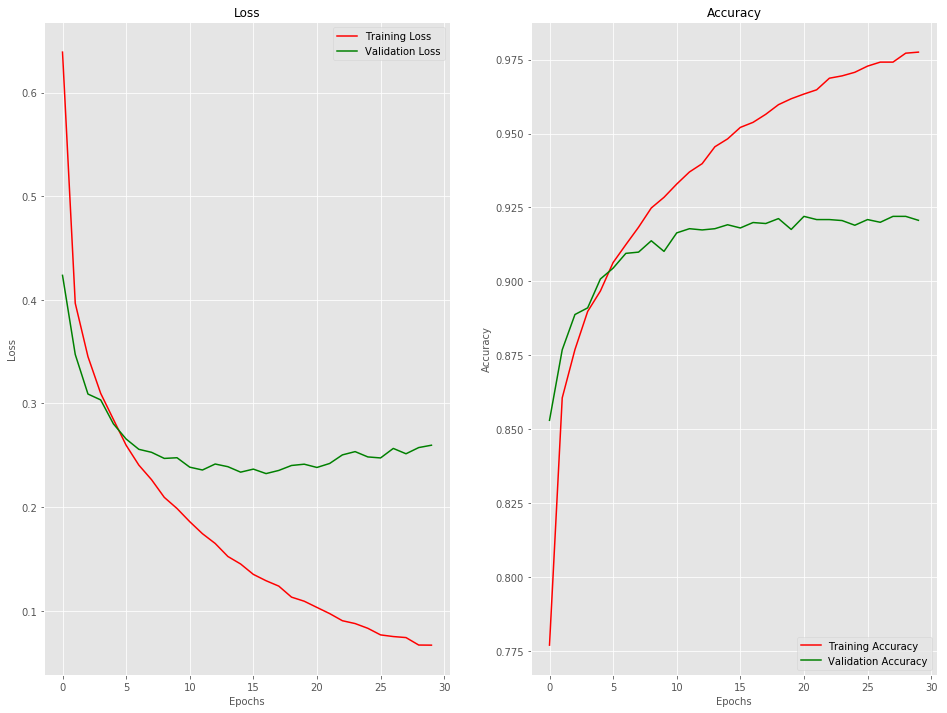

In [6]:
hist = fashion_model_two.fit(x, y, batch_size=200, epochs=30, validation_split=0.2)
show_final_history(hist)

In [7]:
#hist.history

{'loss': [0.6389956998328368,
  0.39676239813367525,
  0.34521740979204574,
  0.30977098575482764,
  0.2846491361036897,
  0.25973762286206087,
  0.24054797341426212,
  0.22646366202582915,
  0.20943599259480833,
  0.19871437922120094,
  0.18599340586612623,
  0.17438694791247447,
  0.16497271213059625,
  0.15239886371418834,
  0.14515837139139573,
  0.1351388191183408,
  0.12901116263431808,
  0.12381271252719064,
  0.11318868479381004,
  0.10924582046767076,
  0.10325063027751942,
  0.0973025240159283,
  0.0904239270525674,
  0.08768865849512318,
  0.08311252932374676,
  0.07675365194057425,
  0.07515568735543639,
  0.07416593325324357,
  0.06696403921426584,
  0.06686041186718891],
 'acc': [0.77710414,
  0.8606667,
  0.8769792,
  0.889875,
  0.89677083,
  0.90639585,
  0.9124375,
  0.91833335,
  0.92483336,
  0.9284375,
  0.93291664,
  0.937,
  0.9398125,
  0.9455208,
  0.9481875,
  0.9520625,
  0.9537708,
  0.9565,
  0.95975,
  0.96175,
  0.9633333,
  0.96477085,
  0.9686875,
  0.9